In [6]:
import gensim
import zipfile
import wget
import math
import networkx as nx
import matplotlib.pyplot as plt

model_url = 'http://vectors.nlpl.eu/repository/11/180.zip'
m = wget.download(model_url)
model_file = model_url.split('/')[-1]
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

2019-04-08 14:01:51,385 : INFO : loading projection weights from <zipfile.ZipExtFile name='model.bin' mode='r' compress_type=deflate>
2019-04-08 14:02:04,791 : INFO : loaded (189193, 300) matrix from <zipfile.ZipExtFile [closed]>


In [230]:
from pylab import rcParams

In [541]:
rcParams['figure.figsize'] = 7,7

In [545]:
from math import log
def similar_graph(word, model, n):
    words = []
    nodelist = []
    if word in model:
        for i in model.most_similar(positive=[word], topn=n):
            dist = log(i[1])*((-10)+2)
            tup = (word, i[0], dist)
            words.append(tup)
            nodelist.append(i[0])
    my_graph = nx.Graph()
    my_graph.add_weighted_edges_from(words)
    #nx.local_reaching_centrality(my_graph, word, weight='weight')
    pos=nx.spring_layout(my_graph, k=1, scale=5, iterations=100)
    nx.draw(my_graph, pos, with_labels = True)
    nx.draw_networkx_nodes(my_graph,pos,
                       nodelist=[word],
                       node_color='#f26f6f',
                       node_size=600)
    nx.draw_networkx_nodes(my_graph,pos,
                       nodelist=nodelist,
                       node_color='#A0CBE2',
                       node_size=300)
    nx.draw_networkx_edges(my_graph,pos,
                       edgelist=words,
                       width=4,alpha=0.5,edge_color='#ed9797')

    
    a = plt.show()
    plt.savefig('labels.png')
    return a


[('коза_NOUN', 'корова_NOUN', 3.08789473826962), ('коза_NOUN', 'козленок_NOUN', 3.5966049966894373), ('коза_NOUN', 'овца_NOUN', 3.719655617490589), ('коза_NOUN', 'баран_NOUN', 3.8906473764485177), ('коза_NOUN', 'буйволица_NOUN', 3.949047216270345), ('коза_NOUN', 'козленка_NOUN', 4.023695589808448), ('коза_NOUN', 'телят_NOUN', 4.103696866683918), ('коза_NOUN', 'стадо_NOUN', 4.173569128864701), ('коза_NOUN', 'кабан_NOUN', 4.203201658722652), ('коза_NOUN', 'теленок_NOUN', 4.2293433387273565), ('коза_NOUN', 'буренка_NOUN', 4.28711757531068), ('коза_NOUN', 'козочка_NOUN', 4.325310036001043), ('коза_NOUN', 'свинья_NOUN', 4.3499922891467895), ('коза_NOUN', 'отар_NOUN', 4.447223298622183), ('коза_NOUN', 'телок_NOUN', 4.448129545982745), ('коза_NOUN', 'марал_NOUN', 4.465466938691733), ('коза_NOUN', 'козел_NOUN', 4.470649059909365), ('коза_NOUN', 'корова_ADJ', 4.571586397928155), ('коза_NOUN', 'пастух_NOUN', 4.604598585238232), ('коза_NOUN', 'архар_NOUN', 4.667496573011867)]


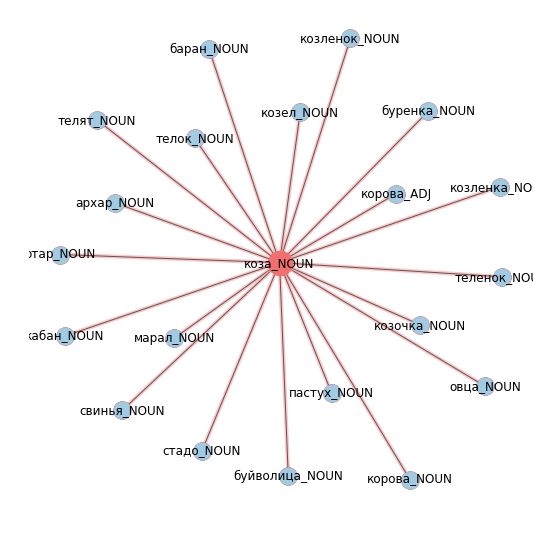

<Figure size 504x504 with 0 Axes>

In [549]:
similar_graph('коза_NOUN', model, 20)